In [40]:
######## Package setup ########
import sys
sys.path.insert(0,'..')

In [41]:
from earth_data_plot import distribution_plot, logged_distribution_plot, correlation_plot
from sklearn import preprocessing

In [42]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [44]:
######## Read Data ########
df = pd.read_csv("OLIVINES.csv", encoding = 'unicode_escape')
df.head()

,CITATION,SAMPLE NAME,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE (MIN.),LATITUDE (MAX.),LONGITUDE (MIN.),LONGITUDE (MAX.),LAND/SEA (SAMPLING),...,LAIHUNITE(MOL%),LARNITE(MOL%),LIEBENBERGITE(MOL%),MONTICELLITE(MOL%),ORTHOCLASE(MOL%),TEPHROITE(MOL%),WOLLASTONITE(MOL%),AGE(KA),AGE(MA),Unnamed: 371
0,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[5] GARCIA M. O. (1996),samp. UNIT49,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[5] GARCIA M. O. (1996),samp. UNIT49,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
num_cols = ['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)',
            'NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)',
            'K2O(WT%)','NI(PPM)','P2O5(WT%)']
df[num_cols] = df[num_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

MGO(WT%)      171396
SIO2(WT%)     170277
FEOT(WT%)     165853
CAO(WT%)      159102
MNO(WT%)      157504
NIO(WT%)      148166
AL2O3(WT%)     95462
CR2O3(WT%)     87881
TIO2(WT%)      76680
NA2O(WT%)      39980
K2O(WT%)       25302
NI(PPM)        17848
P2O5(WT%)      10764
dtype: int64


<AxesSubplot:>

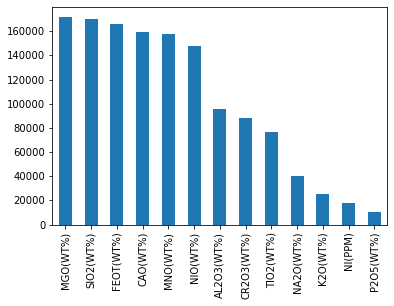

In [46]:
df1 = df[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
df2 = df[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)']]
df3 = df[['CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
print(df1.count(axis = 0))
(df1.count(axis = 0)).plot.bar()

In [47]:
df2.describe(percentiles=np.arange(0, 1, 0.05))

,MGO(WT%),SIO2(WT%),FEOT(WT%),CAO(WT%),MNO(WT%),NIO(WT%),AL2O3(WT%)
count,171396.000000,170277.000000,165853.000000,159102.000000,157504.000000,148166.000000,95462.000000
mean,42.738403,39.215618,16.988865,0.417316,0.371249,0.221120,0.068288
std,7.489092,1.885793,8.486794,2.579741,1.096792,0.176255,0.692292
min,0.000000,0.052000,0.000000,0.000000,-0.058549,0.000000,-0.010000
0%,0.000000,0.052000,0.000000,0.000000,-0.058549,0.000000,-0.010000
5%,31.697935,36.672901,7.681690,0.020000,0.100000,0.009500,0.000000
10%,35.279999,37.462002,8.640000,0.041000,0.120000,0.033400,0.000000
15%,36.950001,37.849998,9.430000,0.063000,0.133000,0.054100,0.000000
20%,38.355301,38.139999,10.210000,0.091203,0.149446,0.075000,0.006600
25%,39.439999,38.391998,11.014876,0.130000,0.160000,0.097800,0.010000


In [48]:
df3.describe(percentiles=np.arange(0, 1, 0.05))

,CR2O3(WT%),TIO2(WT%),NA2O(WT%),K2O(WT%),NI(PPM),P2O5(WT%)
count,87881.000000,76680.000000,39980.000000,25302.000000,17848.000000,10764.000000
mean,0.039672,0.037711,0.053504,0.026635,2386.097168,0.033884
std,0.125087,0.260975,0.157132,0.145641,1019.938660,0.106478
min,-0.003200,-0.004800,-0.002070,-0.001860,0.000000,0.000000
0%,-0.003200,-0.004800,-0.002070,-0.001860,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,835.161926,0.000000
10%,0.000000,0.000000,0.000000,0.000000,1152.069946,0.000000
15%,0.000000,0.000000,0.000000,0.000000,1398.493408,0.000000
20%,0.002000,0.000000,0.000000,0.000000,1560.000000,0.000000
25%,0.008000,0.002882,0.000000,0.000000,1697.512573,0.002000


In [66]:
######## 去除每个元素的前后5% ########
df_clear = df.drop(df[(df['MGO(WT%)']<(df['MGO(WT%)'].quantile(0.25)- 1.5*(df['MGO(WT%)'].quantile(0.75) - df['MGO(WT%)'].quantile(0.25)))) | 
                      (df['MGO(WT%)']>(df['MGO(WT%)'].quantile(0.25)+ 1.5*(df['MGO(WT%)'].quantile(0.75) - df['MGO(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['SIO2(WT%)']<(df['SIO2(WT%)'].quantile(0.25)- 1.5*(df['SIO2(WT%)'].quantile(0.75) - df['SIO2(WT%)'].quantile(0.25)))) | 
                                  (df_clear['SIO2(WT%)']>(df['SIO2(WT%)'].quantile(0.25)+ 1.5*(df['SIO2(WT%)'].quantile(0.75) - df['SIO2(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['FEOT(WT%)']<(df['FEOT(WT%)'].quantile(0.25)- 1.5*(df['FEOT(WT%)'].quantile(0.75) - df['FEOT(WT%)'].quantile(0.25)))) | 
                                  (df_clear['FEOT(WT%)']>(df['FEOT(WT%)'].quantile(0.25)+ 1.5*(df['FEOT(WT%)'].quantile(0.75) - df['FEOT(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['CAO(WT%)']<(df['CAO(WT%)'].quantile(0.25)- 1.5*(df['CAO(WT%)'].quantile(0.75) - df['CAO(WT%)'].quantile(0.25)))) | 
                                  (df_clear['CAO(WT%)']>(df['CAO(WT%)'].quantile(0.25)+ 1.5*(df['CAO(WT%)'].quantile(0.75) - df['CAO(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['MNO(WT%)']<(df['MNO(WT%)'].quantile(0.25)- 1.5*(df['MNO(WT%)'].quantile(0.75) - df['MNO(WT%)'].quantile(0.25)))) | 
                                  (df_clear['MNO(WT%)']>(df['MNO(WT%)'].quantile(0.25)+ 1.5*(df['MNO(WT%)'].quantile(0.75) - df['MNO(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['NIO(WT%)']<(df['NIO(WT%)'].quantile(0.25)- 1.5*(df['NIO(WT%)'].quantile(0.75) - df['NIO(WT%)'].quantile(0.25)))) | 
                                  (df_clear['NIO(WT%)']>(df['NIO(WT%)'].quantile(0.25)+ 1.5*(df['NIO(WT%)'].quantile(0.75) - df['NIO(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['AL2O3(WT%)']<(df['AL2O3(WT%)'].quantile(0.25)- 1.5*(df['AL2O3(WT%)'].quantile(0.75) - df['AL2O3(WT%)'].quantile(0.25)))) | 
                                  (df_clear['AL2O3(WT%)']>(df['AL2O3(WT%)'].quantile(0.25)+ 1.5*(df['AL2O3(WT%)'].quantile(0.75) - df['AL2O3(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['CR2O3(WT%)']<(df['CR2O3(WT%)'].quantile(0.25)- 1.5*(df['CR2O3(WT%)'].quantile(0.75) - df['CR2O3(WT%)'].quantile(0.25)))) | 
                                  (df_clear['CR2O3(WT%)']>(df['CR2O3(WT%)'].quantile(0.25)+ 1.5*(df['CR2O3(WT%)'].quantile(0.75) - df['CR2O3(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['TIO2(WT%)']<(df['TIO2(WT%)'].quantile(0.25)- 1.5*(df['TIO2(WT%)'].quantile(0.75) - df['TIO2(WT%)'].quantile(0.25)))) | 
                                  (df_clear['TIO2(WT%)']>(df['TIO2(WT%)'].quantile(0.25)+ 1.5*(df['TIO2(WT%)'].quantile(0.75) - df['TIO2(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['NA2O(WT%)']<(df['NA2O(WT%)'].quantile(0.25)- 1.5*(df['NA2O(WT%)'].quantile(0.75) - df['NA2O(WT%)'].quantile(0.25)))) | 
                                  (df_clear['NA2O(WT%)']>(df['NA2O(WT%)'].quantile(0.25)+ 1.5*(df_clear['NA2O(WT%)'].quantile(0.75) - df['NA2O(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['K2O(WT%)']<(df['K2O(WT%)'].quantile(0.25)- 1.5*(df['K2O(WT%)'].quantile(0.75) - df['K2O(WT%)'].quantile(0.25)))) | 
                                  (df_clear['K2O(WT%)']>(df['K2O(WT%)'].quantile(0.25)+ 1.5*(df['K2O(WT%)'].quantile(0.75) - df['K2O(WT%)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['NI(PPM)']<(df['NI(PPM)'].quantile(0.25)- 1.5*(df['NI(PPM)'].quantile(0.75) - df['NI(PPM)'].quantile(0.25)))) | 
                                  (df_clear['NI(PPM)']>(df['NI(PPM)'].quantile(0.25)+ 1.5*(df['NI(PPM)'].quantile(0.75) - df['NI(PPM)'].quantile(0.25))))].index)

df_clear = df_clear.drop(df_clear[(df_clear['P2O5(WT%)']<(df['P2O5(WT%)'].quantile(0.25)- 1.5*(df['P2O5(WT%)'].quantile(0.75) - df['P2O5(WT%)'].quantile(0.25)))) | 
                                  (df_clear['P2O5(WT%)']>(df['P2O5(WT%)'].quantile(0.25)+ 1.5*(df['P2O5(WT%)'].quantile(0.75) - df['P2O5(WT%)'].quantile(0.25))))].index)

MGO(WT%)      104260
SIO2(WT%)     103204
FEOT(WT%)     101428
CAO(WT%)       94754
MNO(WT%)       93490
NIO(WT%)       91112
AL2O3(WT%)     51929
CR2O3(WT%)     52779
TIO2(WT%)      38773
NA2O(WT%)      17262
K2O(WT%)       10080
NI(PPM)        14342
P2O5(WT%)       5172
dtype: int64


<AxesSubplot:>

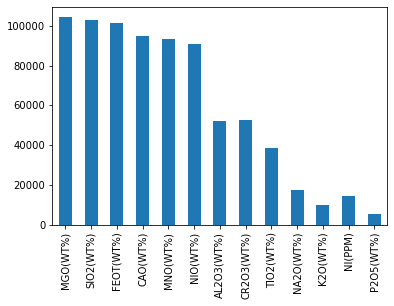

In [67]:
df4 = df_clear[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
print(df4.count(axis = 0))
(df4.count(axis = 0)).plot.bar()

In [68]:
######## MGO ########
df=df_clear
bins = [0,25,30,35,40,45,50,55,100]
df['MGO(WT%)'] = df['MGO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['MGO(WT%)'], bins)

0         (45.0, 50.0]
1         (45.0, 50.0]
2         (40.0, 45.0]
5         (30.0, 35.0]
6         (25.0, 30.0]
              ...     
188808             NaN
188809             NaN
188810             NaN
188811             NaN
188812             NaN
Name: MGO(WT%), Length: 121416, dtype: category
Categories (8, interval[int64]): [(0, 25] < (25, 30] < (30, 35] < (35, 40] < (40, 45] < (45, 50] < (50, 55] < (55, 100]]

In [69]:
df['MGO(WT%)'].groupby(pd.cut(df['MGO(WT%)'], bins)).count()

MGO(WT%)
(0, 25]          0
(25, 30]        13
(30, 35]       269
(35, 40]     15077
(40, 45]     41000
(45, 50]     40983
(50, 55]      6918
(55, 100]        0
Name: MGO(WT%), dtype: int64

<AxesSubplot:xlabel='MGO(WT%)'>

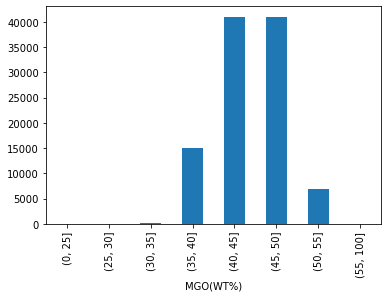

In [70]:
(df['MGO(WT%)'].groupby(pd.cut(df['MGO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='MGO(WT%)', ylabel='Density'>

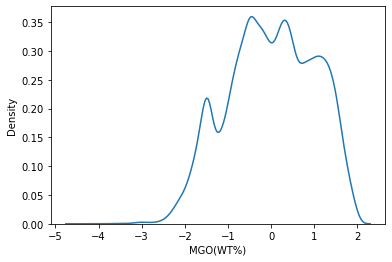

In [71]:
df['MGO(WT%)']=standardization(df['MGO(WT%)'])
sns.kdeplot(df['MGO(WT%)'])

In [72]:
######## SIO2 ########
bins = [0,28,30,32,34,36,38,40,42,43,100]
df['SIO2(WT%)'] = df['SIO2(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['SIO2(WT%)'], bins)

0         (38.0, 40.0]
1         (40.0, 42.0]
2         (38.0, 40.0]
5         (36.0, 38.0]
6         (34.0, 36.0]
              ...     
188808             NaN
188809             NaN
188810             NaN
188811             NaN
188812             NaN
Name: SIO2(WT%), Length: 121416, dtype: category
Categories (10, interval[int64]): [(0, 28] < (28, 30] < (30, 32] < (32, 34] ... (38, 40] < (40, 42] < (42, 43] < (43, 100]]

In [73]:
df['SIO2(WT%)'].groupby(pd.cut(df['SIO2(WT%)'], bins)).count()

SIO2(WT%)
(0, 28]          0
(28, 30]         0
(30, 32]         0
(32, 34]         0
(34, 36]       121
(36, 38]      6645
(38, 40]     61557
(40, 42]     34881
(42, 43]         0
(43, 100]        0
Name: SIO2(WT%), dtype: int64

<AxesSubplot:xlabel='SIO2(WT%)'>

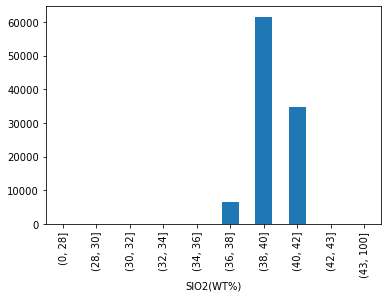

In [74]:
(df['SIO2(WT%)'].groupby(pd.cut(df['SIO2(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='SIO2(WT%)', ylabel='Density'>

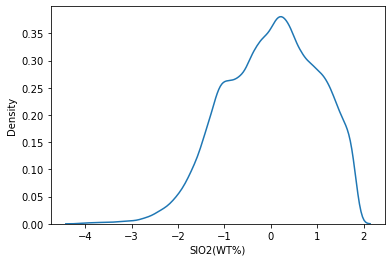

In [75]:
df['SIO2(WT%)']=standardization(df['SIO2(WT%)'])
sns.kdeplot(df['SIO2(WT%)'])

In [76]:
######## FEOT ########
bins = [0,10,20,30,40,50,55,100]
df['FEOT(WT%)'] = df['FEOT(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['FEOT(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: FEOT(WT%), Length: 121416, dtype: category
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 55] < (55, 100]]

In [77]:
df['FEOT(WT%)'].groupby(pd.cut(df['FEOT(WT%)'], bins)).count()

FEOT(WT%)
(0, 10]      15132
(10, 20]     68139
(20, 30]     18157
(30, 40]         0
(40, 50]         0
(50, 55]         0
(55, 100]        0
Name: FEOT(WT%), dtype: int64

<AxesSubplot:xlabel='FEOT(WT%)'>

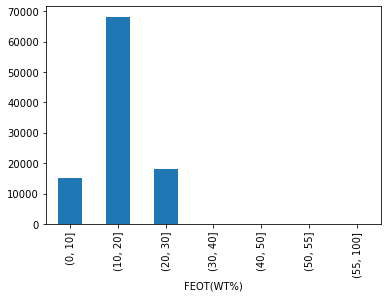

In [78]:
(df['FEOT(WT%)'].groupby(pd.cut(df['FEOT(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='FEO(WT%)', ylabel='Density'>

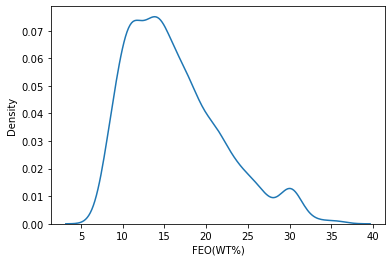

In [79]:
df['FEOT(WT%)']=standardization(df['FEOT(WT%)'])
sns.kdeplot(df['FEO(WT%)'])

In [80]:
######## CAO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['CAO(WT%)'] = df['CAO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['CAO(WT%)'], bins)

0         (0.2, 0.3]
1         (0.3, 0.4]
2         (0.3, 0.4]
5         (0.3, 0.4]
6         (0.3, 0.4]
             ...    
188808           NaN
188809           NaN
188810           NaN
188811           NaN
188812           NaN
Name: CAO(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [81]:
df['CAO(WT%)'].groupby(pd.cut(df['CAO(WT%)'], bins)).count()

CAO(WT%)
(0.0, 0.1]       20541
(0.1, 0.2]       17669
(0.2, 0.3]       36065
(0.3, 0.4]       18572
(0.4, 0.5]         828
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: CAO(WT%), dtype: int64

<AxesSubplot:xlabel='CAO(WT%)'>

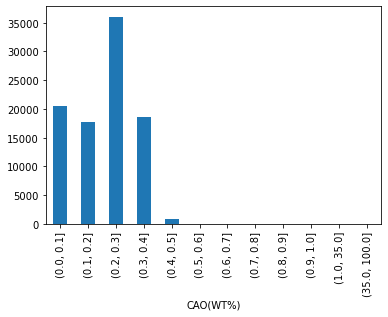

In [82]:
(df['CAO(WT%)'].groupby(pd.cut(df['CAO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='CAO(WT%)', ylabel='Density'>

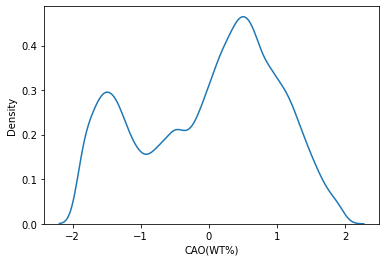

In [83]:
df['CAO(WT%)']=standardization(df['CAO(WT%)'])
sns.kdeplot(df['CAO(WT%)'])

In [84]:
######## MNO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['MNO(WT%)'] = df['MNO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['MNO(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: MNO(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [85]:
df['MNO(WT%)'].groupby(pd.cut(df['MNO(WT%)'], bins)).count()

MNO(WT%)
(0.0, 0.1]        2628
(0.1, 0.2]       33671
(0.2, 0.3]       34213
(0.3, 0.4]       13913
(0.4, 0.5]        8620
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: MNO(WT%), dtype: int64

<AxesSubplot:xlabel='MNO(WT%)'>

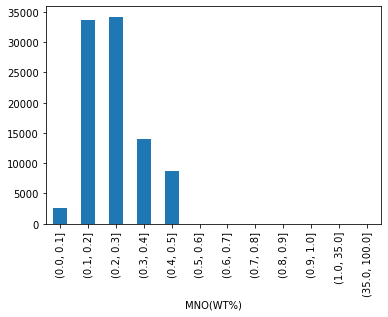

In [86]:
(df['MNO(WT%)'].groupby(pd.cut(df['MNO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='MNO(WT%)', ylabel='Density'>

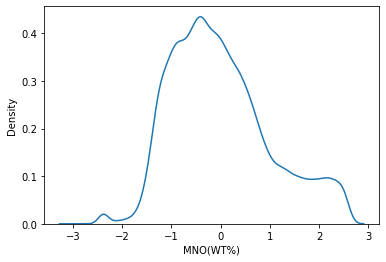

In [87]:
df['MNO(WT%)']=standardization(df['MNO(WT%)'])
sns.kdeplot(df['MNO(WT%)'])

In [88]:
######## NIO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['NIO(WT%)'] = df['NIO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NIO(WT%)'], bins)

0         (0.2, 0.3]
1         (0.2, 0.3]
2         (0.2, 0.3]
5         (0.0, 0.1]
6         (0.0, 0.1]
             ...    
188808           NaN
188809           NaN
188810           NaN
188811           NaN
188812           NaN
Name: NIO(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [89]:
df['NIO(WT%)'].groupby(pd.cut(df['NIO(WT%)'], bins)).count()

NIO(WT%)
(0.0, 0.1]       16613
(0.1, 0.2]       22327
(0.2, 0.3]       22321
(0.3, 0.4]       22577
(0.4, 0.5]        5631
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: NIO(WT%), dtype: int64

<AxesSubplot:xlabel='NIO(WT%)'>

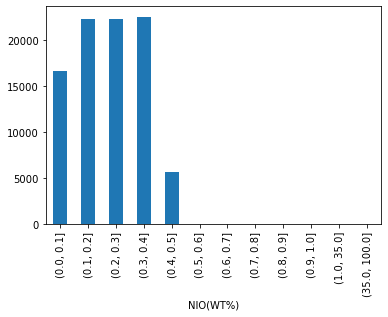

In [90]:
(df['NIO(WT%)'].groupby(pd.cut(df['NIO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NIO(WT%)', ylabel='Density'>

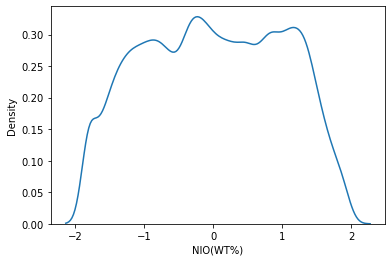

In [91]:
df['NIO(WT%)']=standardization(df['NIO(WT%)'])
sns.kdeplot(df['NIO(WT%)'])

In [92]:
######## AL2O3 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['AL2O3(WT%)'] = df['AL2O3(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['AL2O3(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: AL2O3(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [93]:
df['AL2O3(WT%)'].groupby(pd.cut(df['AL2O3(WT%)'], bins)).count()

AL2O3(WT%)
(0.0, 0.1]       44645
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: AL2O3(WT%), dtype: int64

<AxesSubplot:xlabel='AL2O3(WT%)'>

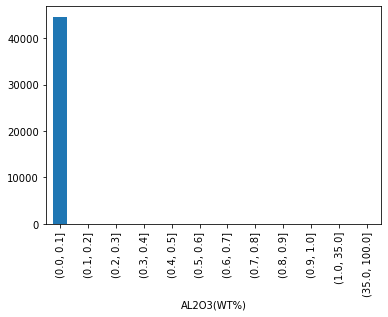

In [94]:
(df['AL2O3(WT%)'].groupby(pd.cut(df['AL2O3(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='AL2O3(WT%)', ylabel='Density'>

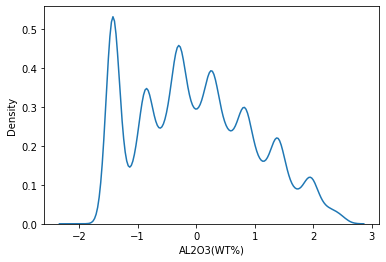

In [95]:
df['AL2O3(WT%)']=standardization(df['AL2O3(WT%)'])
sns.kdeplot(df['AL2O3(WT%)'])

In [96]:
######## CR2O3 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['CR2O3(WT%)'] = df['CR2O3(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['CR2O3(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: CR2O3(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [97]:
df['CR2O3(WT%)'].groupby(pd.cut(df['CR2O3(WT%)'], bins)).count()

CR2O3(WT%)
(0.0, 0.1]       42809
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: CR2O3(WT%), dtype: int64

<AxesSubplot:xlabel='CR2O3(WT%)'>

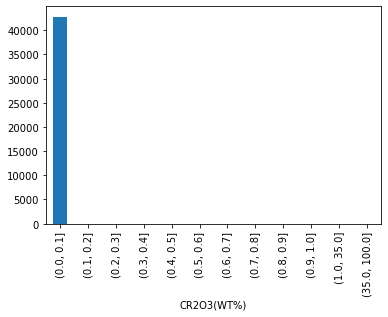

In [98]:
(df['CR2O3(WT%)'].groupby(pd.cut(df['CR2O3(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='CR2O3(WT%)', ylabel='Density'>

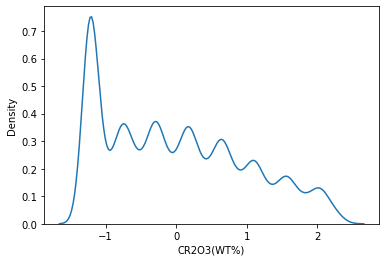

In [99]:
df['CR2O3(WT%)']=standardization(df['CR2O3(WT%)'])
sns.kdeplot(df['CR2O3(WT%)'])

In [100]:
######## TIO2 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['TIO2(WT%)'] = df['TIO2(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['TIO2(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: TIO2(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [101]:
df['TIO2(WT%)'].groupby(pd.cut(df['TIO2(WT%)'], bins)).count()

TIO2(WT%)
(0.0, 0.1]       29551
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: TIO2(WT%), dtype: int64

<AxesSubplot:xlabel='TIO2(WT%)'>

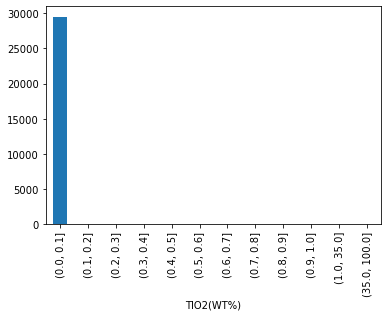

In [102]:
(df['TIO2(WT%)'].groupby(pd.cut(df['TIO2(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='TIO2(WT%)', ylabel='Density'>

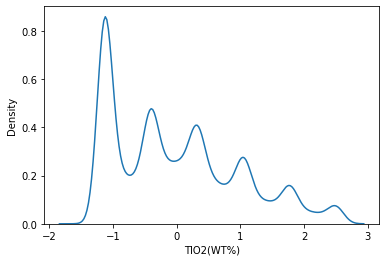

In [103]:
df['TIO2(WT%)']=standardization(df['TIO2(WT%)'])
sns.kdeplot(df['TIO2(WT%)'])

In [104]:
######## NA2O ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['NA2O(WT%)'] = df['NA2O(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NA2O(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: NA2O(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [105]:
df['NA2O(WT%)'].groupby(pd.cut(df['NA2O(WT%)'], bins)).count()

NA2O(WT%)
(0.0, 0.1]       11514
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: NA2O(WT%), dtype: int64

<AxesSubplot:xlabel='NA2O(WT%)'>

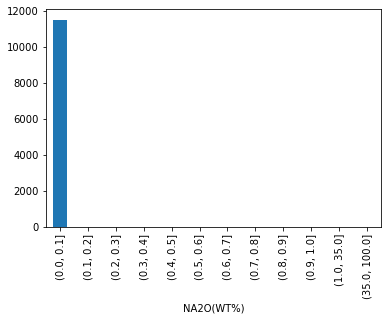

In [106]:
(df['NA2O(WT%)'].groupby(pd.cut(df['NA2O(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NA2O(WT%)', ylabel='Density'>

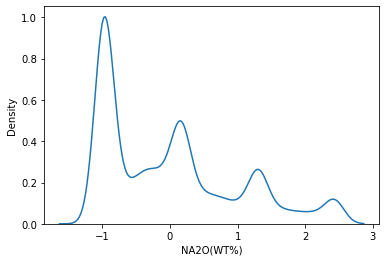

In [107]:
df['NA2O(WT%)']=standardization(df['NA2O(WT%)'])
sns.kdeplot(df['NA2O(WT%)'])

In [108]:
######## K2O ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['K2O(WT%)'] = df['K2O(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['K2O(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: K2O(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [109]:
df['K2O(WT%)'].groupby(pd.cut(df['K2O(WT%)'], bins)).count()

K2O(WT%)
(0.0, 0.1]       4242
(0.1, 0.2]          0
(0.2, 0.3]          0
(0.3, 0.4]          0
(0.4, 0.5]          0
(0.5, 0.6]          0
(0.6, 0.7]          0
(0.7, 0.8]          0
(0.8, 0.9]          0
(0.9, 1.0]          0
(1.0, 35.0]         0
(35.0, 100.0]       0
Name: K2O(WT%), dtype: int64

<AxesSubplot:xlabel='K2O(WT%)'>

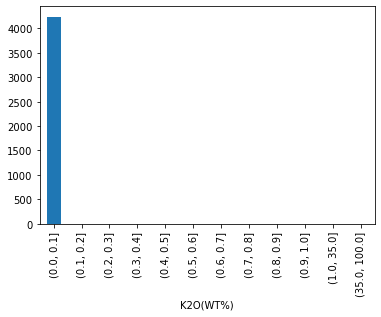

In [110]:
(df['K2O(WT%)'].groupby(pd.cut(df['K2O(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='K2O(WT%)', ylabel='Density'>

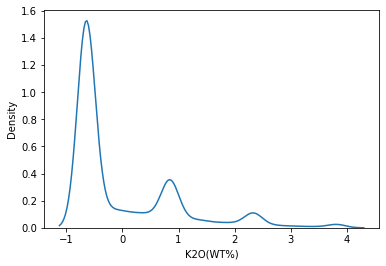

In [111]:
df['K2O(WT%)']=standardization(df['K2O(WT%)'])
sns.kdeplot(df['K2O(WT%)'])

In [112]:
######## NI ########
bins = [0,100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
df['NI(PPM)'] = df['NI(PPM)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NI(PPM)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: NI(PPM), Length: 121416, dtype: category
Categories (11, interval[int64]): [(0, 100] < (100, 1000] < (1000, 2000] < (2000, 3000] ... (6000, 7000] < (7000, 8000] < (8000, 9000] < (9000, 10000]]

In [113]:
df['NI(PPM)'].groupby(pd.cut(df['NI(PPM)'], bins)).count()

NI(PPM)
(0, 100]           19
(100, 1000]      1076
(1000, 2000]     4631
(2000, 3000]     6065
(3000, 4000]     2544
(4000, 5000]        0
(5000, 6000]        0
(6000, 7000]        0
(7000, 8000]        0
(8000, 9000]        0
(9000, 10000]       0
Name: NI(PPM), dtype: int64

<AxesSubplot:xlabel='NI(PPM)'>

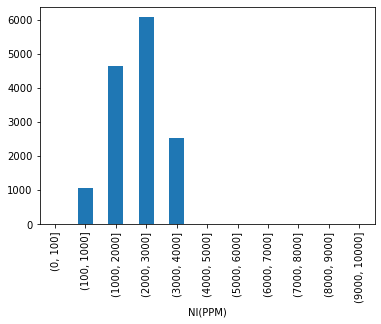

In [114]:
(df['NI(PPM)'].groupby(pd.cut(df['NI(PPM)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NI(PPM)', ylabel='Density'>

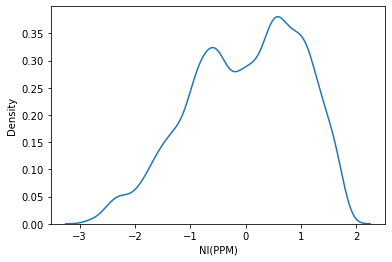

In [115]:
df['NI(PPM)']=standardization(df['NI(PPM)'])
sns.kdeplot(df['NI(PPM)'])

In [116]:
######## P2O5 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['P2O5(WT%)'] = df['P2O5(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['P2O5(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
6         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: P2O5(WT%), Length: 121416, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [117]:
df['P2O5(WT%)'].groupby(pd.cut(df['P2O5(WT%)'], bins)).count()

P2O5(WT%)
(0.0, 0.1]       4398
(0.1, 0.2]          0
(0.2, 0.3]          0
(0.3, 0.4]          0
(0.4, 0.5]          0
(0.5, 0.6]          0
(0.6, 0.7]          0
(0.7, 0.8]          0
(0.8, 0.9]          0
(0.9, 1.0]          0
(1.0, 35.0]         0
(35.0, 100.0]       0
Name: P2O5(WT%), dtype: int64

<AxesSubplot:xlabel='P2O5(WT%)'>

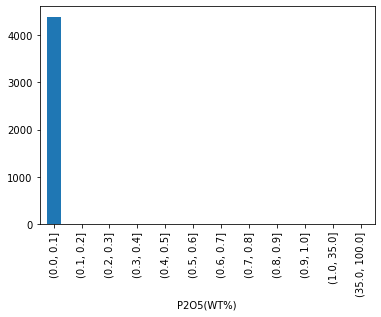

In [118]:
(df['P2O5(WT%)'].groupby(pd.cut(df['P2O5(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='P2O5(WT%)', ylabel='Density'>

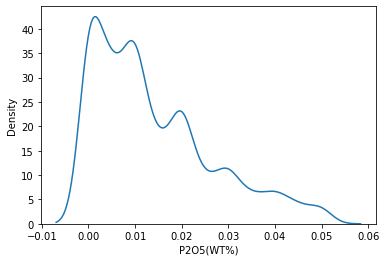

In [119]:
sns.kdeplot(df['P2O5(WT%)'])